### Python 7: Nasa.json dataset Insights:

#### Insights to be drawn as per the statements below:

https://data.nasa.gov/resource/y77d-th95.json

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

url = "https://data.nasa.gov/resource/y77d-th95.json"
data = requests.get(url).json()

temp_list = []

for item in data:
    coordinates = item.get("geolocation", {}).get("coordinates", [])
    
    temp_item = {
        "Name": item.get("name", ""),
        "ID": item.get("id", ""),
        "Name_Type": item.get("nametype", ""),
        "Rec_Class": item.get("recclass", ""),
        "Mass": item.get("mass", ""),
        "Fall": item.get("fall", ""),
        "Year": item.get("year", ""),
        "Rec_latitude": item.get("reclat", ""),
        "Rec_longitude": item.get("reclong", ""),
        "Type": item.get("geolocation", {}).get("type"),        
        "Latitude": coordinates[1] if len(coordinates) > 1 else None,
        "Longitude": coordinates[0] if len(coordinates) > 1 else None,
        
    }
    temp_list.append(temp_item)

df = pd.DataFrame(temp_list)
df.head()

,Name,ID,Name_Type,Rec_Class,Mass,Fall,Year,Rec_latitude,Rec_longitude,Type,Latitude,Longitude
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,Point,50.77500,6.08333
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,Point,56.18333,10.23333
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,Point,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,Point,16.88333,-99.90000
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,Point,-33.16667,-64.95000


#### Get all the Earth meteorites that fell before the year 2000

929 Earth meteorites fell before the year 2000


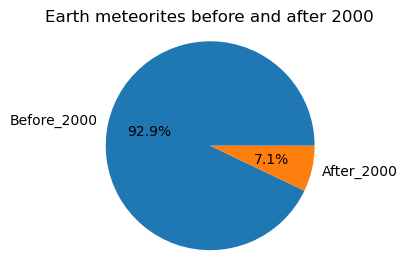

In [2]:
# Get all the Earth meteorites that fell before the year 2000

earth_meteorites_before_2000 = df[(df['Fall'] == 'Fell') & (df['Year'] < '2000-01-01')]
print(f"{earth_meteorites_before_2000.shape[0]} Earth meteorites fell before the year 2000")

labels = ["Before_2000", "After_2000"]
sizes = [len(earth_meteorites_before_2000), len(df)-len(earth_meteorites_before_2000)]

plt.figure(figsize=(4,3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Earth meteorites before and after 2000')
plt.axis('equal')
plt.show()

####  Get all the earth meteorites co-ordinates who fell before the year 1970

780 Earth meteorites' coordinates that fell before the year 1970


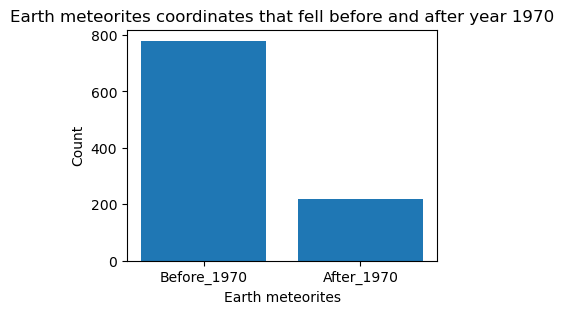

In [3]:
# Get the Earth meteorites' coordinates that fell before the year 1970

coordinates_before_1970 = df[(df['Fall']=='Fell') & (df['Year']<'1970-01-01')][['Latitude', 'Longitude']]
print(f"{coordinates_before_1970.shape[0]} Earth meteorites' coordinates that fell before the year 1970")

# Create a bar chart
labels = ['Before_1970', 'After_1970']
counts = [len(coordinates_before_1970), len(df)-len(coordinates_before_1970)]

plt.figure(figsize=(4,3))
plt.bar(labels, counts)
plt.xlabel('Earth meteorites')
plt.ylabel('Count')
plt.title('Earth meteorites coordinates that fell before and after year 1970')
plt.show()

#### Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

243 Earth meteorites with a mass greater than 10000 kg (10 metric tons)


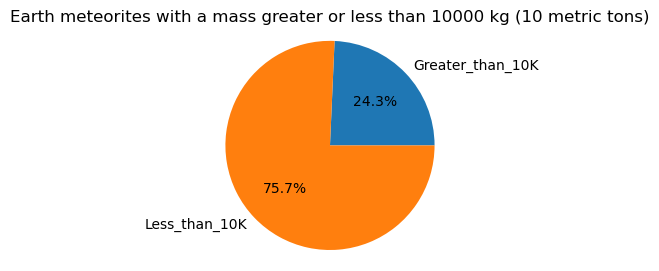

In [4]:
# Get the Earth meteorites with a mass greater than 10000 kg (10 metric tons)

mass_gt_10k = df[pd.to_numeric(df['Mass'], errors='coerce') > 10000]
print(f"{mass_gt_10k.shape[0]} Earth meteorites with a mass greater than 10000 kg (10 metric tons)")

labels = ["Greater_than_10K", "Less_than_10K"]
sizes = [len(mass_gt_10k), len(df)-len(mass_gt_10k)]

plt.figure(figsize=(4,3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Earth meteorites with a mass greater or less than 10000 kg (10 metric tons)')
plt.axis('equal')
plt.show()

In [5]:
mass_gt_10k = df[pd.to_numeric(df['Mass'], errors='coerce') > 10000]
print(f"{mass_gt_10k.shape[0]} Earth meteorites with a mass greater than 10000 kg (10 metric tons)")

243 Earth meteorites with a mass greater than 10000 kg (10 metric tons)
